In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('weatherAus.csv')
display(df)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [5]:
year=pd.to_datetime(df.Date).dt.year
train_df=df[ year < 2015]
test_df=df[ year > 2015]
val_df=df[ year == 2015]
print('tain_df.shape:', train_df.shape)
print('test_df.shape:', test_df.shape)
print('val_df.shape:' ,val_df.shape)

tain_df.shape: (98988, 23)
test_df.shape: (25974, 23)
val_df.shape: (17231, 23)


In [6]:
input_cols=list(train_df.columns)[1:-1]
target_col='RainTomorrow'

In [7]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()

In [8]:
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_col].copy()

In [9]:
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_col].copy()

In [10]:
import numpy as np
train_inputs.select_dtypes(include=np.number).columns.tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [11]:
##how do you find the categorical columns 
train_inputs.select_dtypes(include='object').columns.tolist()

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [12]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes(include='object').columns.tolist()

In [13]:
#from here i can learn every column has how many missing value and and i  can sort it in ascending order so i can see which columns has greater missing values
train_inputs[numeric_cols].isna().sum().sort_values(ascending=False)

Sunshine         40696
Evaporation      37110
Cloud3pm         36766
Cloud9am         35764
Pressure9am       9345
Pressure3pm       9309
WindGustSpeed     6902
Humidity9am       1265
Humidity3pm       1186
WindSpeed3pm      1140
WindSpeed9am      1133
Rainfall          1000
Temp9am            783
Temp3pm            663
MinTemp            434
MaxTemp            198
dtype: int64

In [14]:
#here what does imputer do imputer takes the null value and fill it with the mean of the null value's before and after value it can not only does mean it also has many feature but here i will use meaan
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean').fit(df[numeric_cols])

In [15]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(df[numeric_cols])
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])


In [17]:
val_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
train_inputs[categorical_cols]=train_df[categorical_cols].fillna('Unknown')
test_inputs[categorical_cols]=test_df[categorical_cols].fillna('Unknown')
val_inputs[categorical_cols]=val_df[categorical_cols].fillna('Unknown')


In [20]:
encoder= OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

In [21]:
encoded_cols= list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [22]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

C:\Users\user.FEL-OPS-89155\AppData\Local\Temp\ipykernel_16916\2318466707.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
C:\Users\user.FEL-OPS-89155\AppData\Local\Temp\ipykernel_16916\2318466707.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
C:\Users\user.FEL-OPS-89155\AppData\Local\Temp\ipykernel_16916\2318466707.py:1: PerformanceWarning: DataFrame is highly fragment

In [23]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Unknown,RainToday_Yes
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,Unknown,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,Albury,0.566038,0.523629,0.018329,0.037723,0.525852,ENE,0.193798,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.283019,0.502836,0.000000,0.037723,0.525852,E,0.193798,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,Uluru,0.266509,0.533081,0.000000,0.037723,0.525852,E,0.193798,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,Uluru,0.285377,0.568998,0.000000,0.037723,0.525852,NNW,0.124031,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,Uluru,0.327830,0.599244,0.000000,0.037723,0.525852,N,0.240310,SE,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [24]:
x_train=train_inputs[numeric_cols+encoded_cols]
x_test=test_inputs[numeric_cols+encoded_cols]
x_val=val_inputs[numeric_cols+encoded_cols]

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model=RandomForestClassifier(n_jobs=-1, random_state=42)

In [27]:
model.fit(x_train, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [28]:
model.score(x_train,train_targets),model.score(x_val,val_targets)

(0.9999595910615429, 0.8559572862863444)

In [29]:
len(model.estimators_)

100

In [31]:
from sklearn.tree import plot_tree, export_text

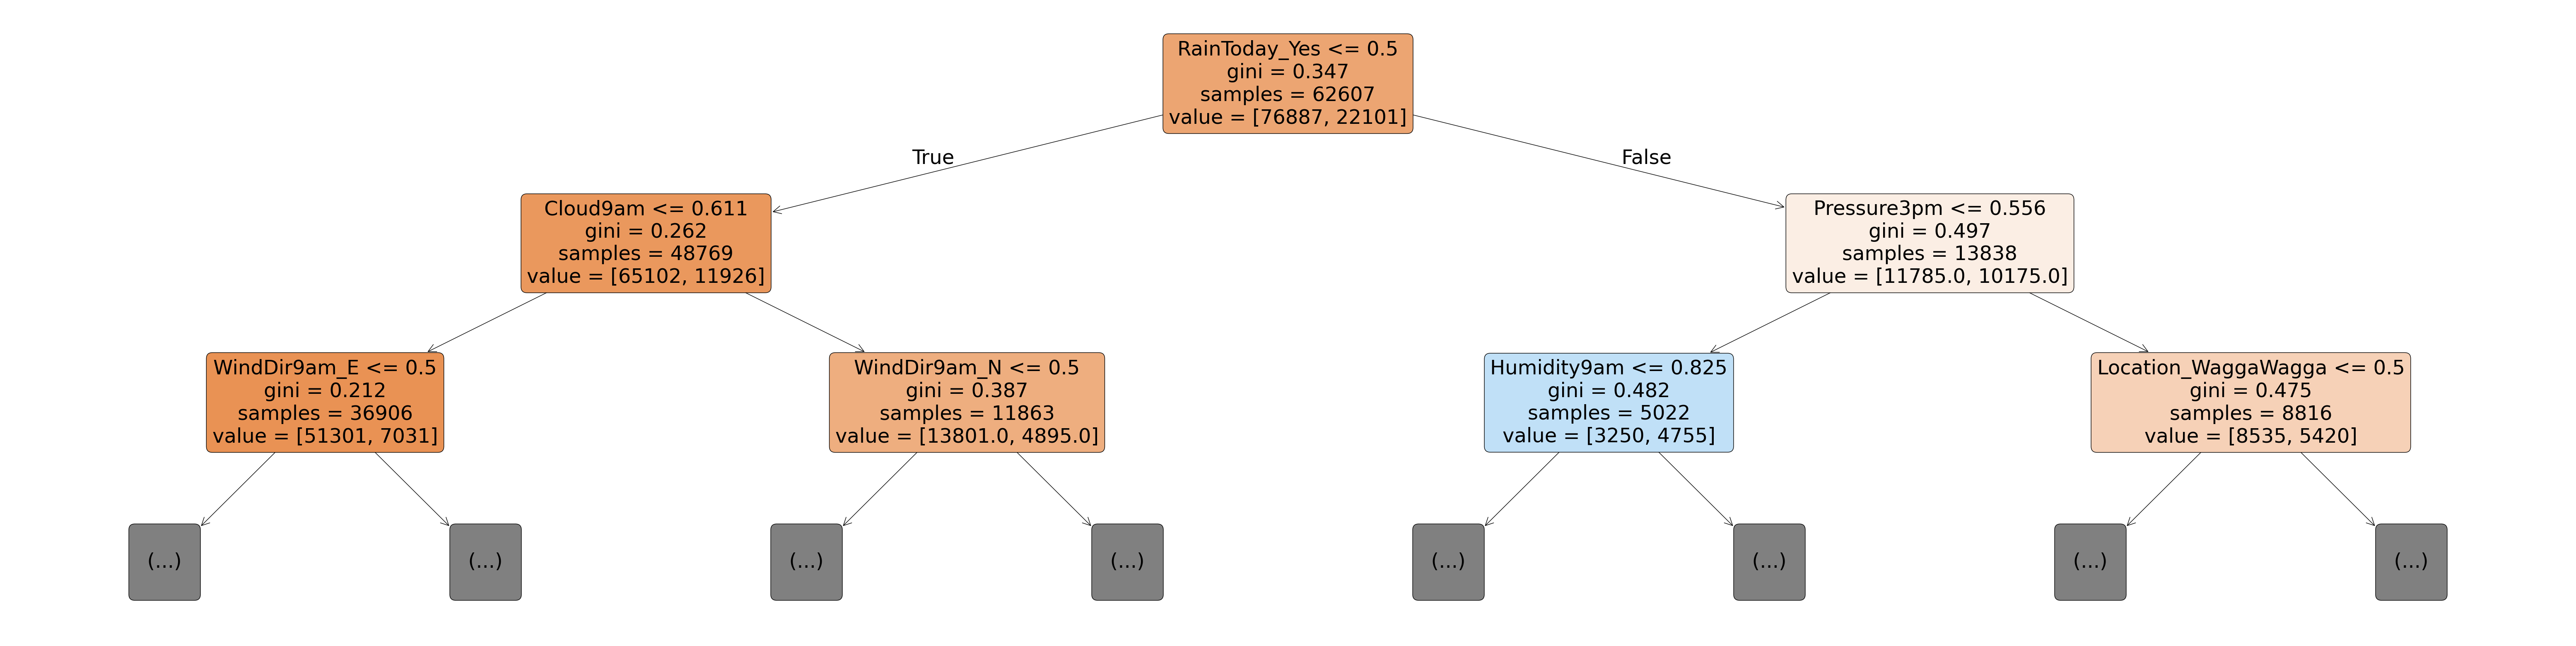

In [32]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], feature_names=x_train.columns, max_depth=2, filled=True, rounded= True);

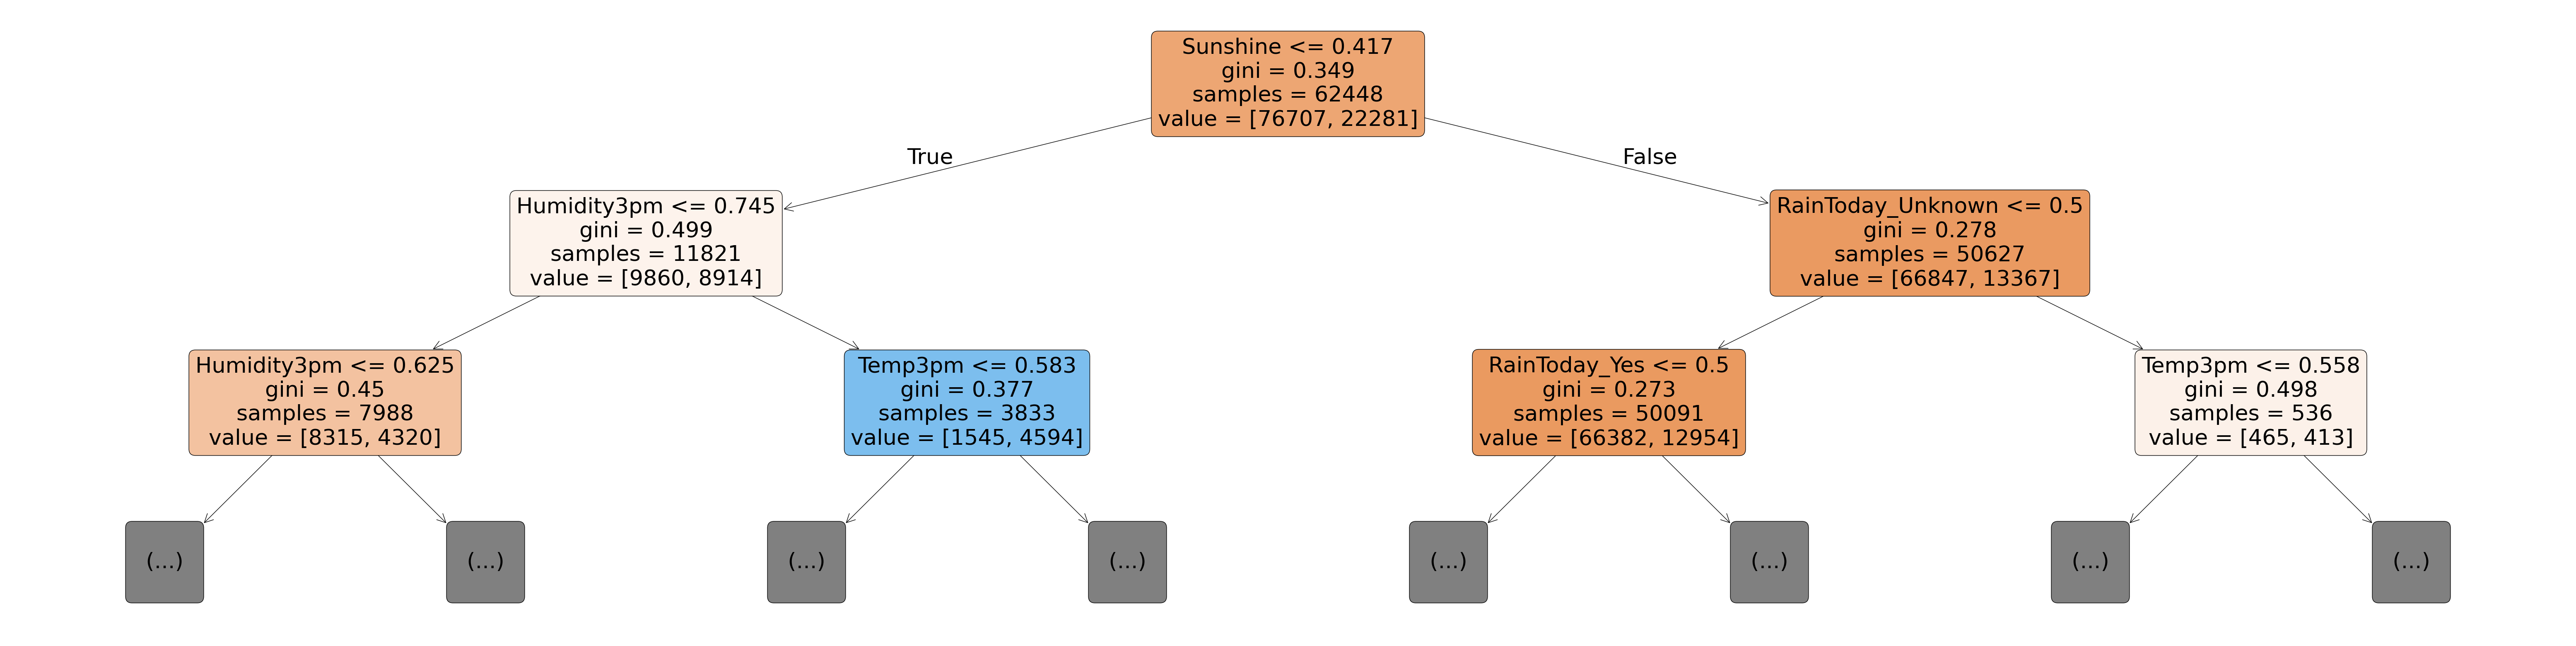

In [33]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[15], feature_names=x_train.columns, max_depth=2, filled=True, rounded= True);

In [34]:
importance_df=pd.DataFrame({'feature': x_train.columns, 'importance':model.feature_importances_}).sort_values('importance',ascending=False)
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.133176
4,Sunshine,0.055553
11,Pressure3pm,0.052976
2,Rainfall,0.050488
10,Pressure9am,0.049379
8,Humidity9am,0.049261
5,WindGustSpeed,0.046640
15,Temp3pm,0.045179
1,MaxTemp,0.042172
0,MinTemp,0.041549


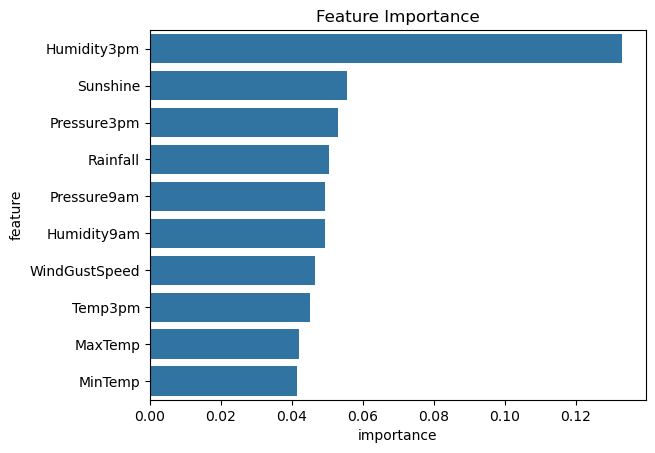

In [35]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature');

In [36]:
base_model=RandomForestClassifier(n_jobs=-1, random_state=42).fit(x_train, train_targets)
base_train_acc=base_model.score(x_train,train_targets)
base_val_acc=base_model.score(x_val,val_targets)

**n_estimators** is a hyperparameter of random forest it indicates number of decision trees in random forest

In [37]:
model=RandomForestClassifier(n_jobs=-1, random_state=42,n_estimators=10).fit(x_train, train_targets)
model.score(x_train,train_targets),model.score(x_val,val_target)

(0.9873520022629005, 0.8441761940688295)

In [38]:
base_accs= base_train_acc, base_val_acc
base_accs

(0.9999595910615429, 0.8559572862863444)

In [39]:
def test_params(**params):
    model=RandomForestClassifier(random_state=42, n_jobs=-1,**params)
    model.fit(x_train,train_targets)
    return model.score(x_train,train_targets), model.score(x_val,val_targets)
    

In [40]:
test_params(max_depth=5)

(0.821847092576878, 0.8262433985259126)

In [41]:
test_params(max_depth=26,max_leaf_nodes=1024,n_estimators=1000)

(0.878540833232311, 0.8510823515756485)

In [42]:
test_params(max_leaf_nodes=2**5)

(0.8307572635066877, 0.8324531367883465)

In [46]:
test_params(max_features='log2')

(0.9999595910615429, 0.8540421333642852)

In [45]:
test_params(max_features=3)# 3 means 3 column

(0.9999595910615429, 0.8528814346236434)

In [47]:
test_params(max_features=5) #here 5 means 5 column

(0.9999595910615429, 0.8549126574197667)

In [50]:
test_params(max_features=20), base_accs

((0.9999494888269285, 0.8575242295862109),
 (0.9999595910615429, 0.8559572862863444))

In [52]:
test_params(min_samples_split=5, min_samples_leaf=2)

(0.9578231704853114, 0.8554930067900877)

In [53]:
test_params(min_samples_split=5, min_samples_leaf=2)

(0.9578231704853114, 0.8554930067900877)

In [55]:
test_params(min_impurity_decrease=1e-7) #Gini value

(0.9996363195538853, 0.8558992513493123)

**Bootstrap**
You randomly pick a row and you forget about it and then again pick a row and then forget about it and it this case you can pick the same row again because you are randomly picking it so there can be repetitive row and thats totally fine and you select this bootstrap and then again select a bootstrap and thats why it is called **bag of bootstrap Bootstrap bagging**

In [56]:
test_params(bootstrap=False)
# here i am not using bootstrap but writting it so that I can understand how to write code when i will use it i set the bootstrap value true
test_params(max_samples=0.9)# when bootstrap is enable we can use the number of rows in fraction or int

(0.9997575463692568, 0.8565956705936975)

# class_wieght


In [58]:
train_targets.value_counts()

RainTomorrow
No     76705
Yes    22283
Name: count, dtype: int64

In [59]:
train_targets.value_counts()/ len(train_targets)

RainTomorrow
No     0.774892
Yes    0.225108
Name: count, dtype: float64

In [60]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [61]:
test_params(class_weight='balanced')


(0.9999494888269285, 0.8556671116011839)

In [64]:
test_params(class_weight={'No':1,'Yes':2})

(0.9999292843576999, 0.8565376356566653)

In [65]:
#putting all the thing together
model=RandomForestClassifier(n_jobs=-1, random_state=42,n_estimators=500, max_features=20, max_depth=30, class_weight={'No':1,'Yes':2})

In [66]:
model.fit(x_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 2}, max_depth=30,
                       max_features=20, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [67]:
model.score(x_train,train_targets),model.score(x_val,val_targets)

(0.9995757061461995, 0.8565376356566653)